# 케라스와 텐서플로 소개

## 텐서플로란?

## 케라스란?

## 케라스와 텐서플로의 간략한 역사

## 딥러닝 작업 환경 설정하기

### 주피터 노트북: 권장하는 딥러닝 실험 도구

### 코랩 사용하기

#### 코랩 시작하기

#### pip로 패키지 설치하기

#### GPU 런타임 사용하기

## 텐서플로 시작하기

### 상수 텐서와 변수

#### 모두 1 또는 모두 0인 텐서

In [1]:
!pip install tensorflow

  Using cached tensorflow-2.13.0-cp39-cp39-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.13.0-cp39-cp39-win_amd64.whl (276.5 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorboard-2.13.0-py3-none-any.whl (5.6 MB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached grpcio-1.57.0-cp39-cp39-win_amd64.whl (4.3 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached google_auth-2.22.0-py2.py3-none-any.whl (181 kB)
  Using cached google_auth_oauthlib-1.0.0-py2.py3-none-any.whl (18 kB)
  Using cached cachetools-5.3.1-py3-none-any.whl (9.3 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)


In [2]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [3]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


#### 랜덤 텐서

In [4]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[-0.2628064 ]
 [-0.0931951 ]
 [ 0.34620592]], shape=(3, 1), dtype=float32)


In [5]:
# 균일 분포(uniform distribution)에서 랜덤한 값들을 생성
# 딥러닝 모델을 초기화하거나 랜덤한 텐서를 생성하는데 유용하게 사용
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.98940134]
 [0.30621648]
 [0.45006108]], shape=(3, 1), dtype=float32)


#### 넘파이 배열에 값 할당하기

In [6]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.

In [7]:
x

array([[0., 1.],
       [1., 1.]])

In [8]:
# 텐서플로우 텐서에 값을 할당하지 못함 -> 변수를 만들려면 랜덤 텐서와 같이 초깃값을 제공해야 함
x = tf.ones(shape=(2, 2))
x[0,0] = 0.

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

#### 텐서플로 변수 만들기

In [11]:
# tf.Variable은 수정 가능한 상태를 관리하기 위한 클래스
import tensorflow as tf
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.80293554],
       [-1.4916487 ],
       [ 0.22535667]], dtype=float32)>


#### 텐서플로 변수에 값 할당하기

In [12]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

#### 변수 일부에 값 할당하기

In [13]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

#### assign_add 사용하기

In [14]:
# assign_add() : += 와 동일
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

### 텐서 연산: 텐서플로에서 수학 계산하기

#### 기본적인 수학 연산

In [15]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)

In [16]:
print(a)
print(b)
print(c)
print(d)
print(e)
e *= d
print(e)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


### GradientTape API 다시 살펴 보기
GradientTape 사용하기
- GradientTape은 TensorFlow의 핵심 기능 중 하나로, 자동 미분을 수행하기 위해 사용되는 도구입니다.
- TensorFlow는 그래디언트(gradient)를 계산하는 데에 GradientTape을 활용하여 연산 과정을 기록

In [17]:
# TensorFlow를 사용하여 변수 input_var의 제곱에 대한 그래디언트(기울기)를 계산
# 'result'는 'input_var'의 제곱이므로, 이 미분값은 2 * input_var가 됩니다. input_var의 초기값이 3이므로, gradient는 6
input_var = tf.Variable(initial_value=3.)
# tf.GradientTape()를 사용하여 GradientTape 컨텍스트를 생성합니다. 이제부터 tape를 사용하여 연산을 기록
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var) # tape.gradient()를 사용하여 result에 대한 input_var의 그래디언트를 계산

In [18]:
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

#### 상수 입력 텐서와 함께 GradientTape 사용하기

In [19]:
# 그래디언트를 계산하려면 미분 대상이 되는 텐서가 관찰 대상으로 지정되어야 하는데, TensorFlow 변수는
# 기본적으로 자동으로 관찰 대상이 됩니다.
# 그러나 상수나 일반 텐서는 그렇지 않기 때문에, 이들에 대해 그래디언트를 계산하려면 먼저 tape.watch() 함수를 사용하여
# 그 텐서를 관찰 대상으로 지정
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const) # 여기서 미분하는 것은 상수가 아니라 상수 값을 가진 텐서에 대한 함수

In [20]:
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

#### 물리학에서 위치, 속도, 그리고 가속도는 서로 미분과 적분을 통해 연결
- 위치(position)는 시간에 대해 미분하면 속도(velocity)가 된다. 이는 위치가 시간에 따라 어떻게 변하는지를 나타내며, 이 변화율이 바로 속도이다. 즉, 위치의 그레디언트(미분값)는 속도이다.
- 속도를 시간에 대해 미분하면 가속도(acceleration)가 된다. 속도가 시간에 따라 어떻게 변하는지를 나타내며, 이 변화율이 바로 가속도이다. 즉, 속도의 그레디언트(미분값)는 가속도이다.
- 따라서, 위치의 두 번째 시간에 대한 미분값(이계도 그레디언트)은 가속도가 된다.

#### 그레이디언트 테이프를 중첩하여 이계도 그레이디언트를 계산하기
- TensorFlow를 사용하여 시간(time)에 따른 위치(position)와 속도(speed)의 변화를 모델링하고, 그에 대한 가속도(acceleration)를 계산하는 예시
- 첫 번째 줄에서는 TensorFlow 변수 time을 생성하고, 초기값을 0.0으로 설정.
- 두 번째 줄에서는 tf.GradientTape()를 사용하여 outer_tape라는 GradientTape 컨텍스트를 생성합니다. outer_tape를 사용하여 가속도에 대한 그래디언트를 계산.
- 세 번째 줄에서는 inner_tape라는 또 다른 GradientTape 컨텍스트를 생성합니다. inner_tape를 사용하여 위치에 대한 그래디언트를 계산.
- 네 번째 줄에서는 position 변수에 4.9 * time ** 2의 연산 결과를 할당합니다. 이 때, 이 연산은 inner_tape 컨텍스트 내에서 기록.
- 다섯 번째 줄에서는 inner_tape.gradient()를 사용하여 position에 대한 time의 그래디언트를 계산합니다. 이를 통해 위치에 대한 시간의 변화율, 즉 속도를 구한다.
- 여섯 번째 줄에서는 outer_tape.gradient()를 사용하여 speed에 대한 time의 그래디언트를 계산합니다. 이를 통해 속도에 대한 시간의 변화율, 즉 가속도를 구한다.

따라서 acceleration에는 time에 대한 speed의 그래디언트가 저장된다. 결과적으로, 이 코드는 시간에 따른 위치를 모델링하고, 이를 기반으로 속도와 가속도를 계산한다. time 변수의 값이 변할 때 위치, 속도 및 가속도의 변화율을 계산하여 모델을 업데이트할 수 있다.

In [21]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

In [22]:
acceleration

<tf.Tensor: shape=(), dtype=float32, numpy=9.8>

### 엔드-투-엔드 예제: 텐서플로 선형 분류기

#### 2D 평면에 두 클래스의 랜덤한 포인트 생성하기

In [23]:
import numpy as np
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

#### 두 클래스를 (2000, 2) 크기의 한 배열로 쌓기

In [24]:
# np.vstack() 함수는 주어진 배열들을 수직으로 쌓아 하나의 배열로 합친다.
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
inputs

array([[ 0.05313809,  1.39625   ],
       [-0.13037917,  2.507683  ],
       [-1.4803158 ,  3.4980962 ],
       ...,
       [ 2.458999  , -2.0083783 ],
       [ 2.3103325 ,  0.7606374 ],
       [ 4.4366155 ,  0.9421534 ]], dtype=float32)

#### (0과 1로 구성된) 타깃 생성하기

In [25]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

In [26]:
targets

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

#### 두 클래스의 포인트를 그래프로 그리기

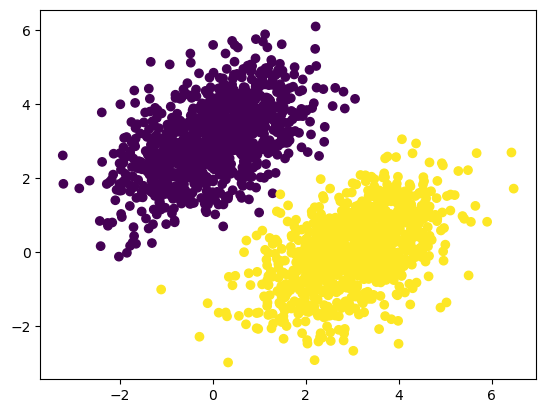

In [27]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0]) # targets 배열의 첫 번째 열의 값에 따라 데이터 포인트의 색상을 지정
plt.show()

#### 선형 분류기의 변수 만들기

In [28]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [29]:
b

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>

#### 정방향 패스 함수

In [30]:
def model(inputs):
    return tf.matmul(inputs, W) + b

#### 평균 제곱 오차 손실 함수

In [31]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

#### 훈련 스텝 함수

In [32]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

#### 배치 훈련 루프

In [33]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"{step}번째 스텝의 손실: {loss:.4f}")

0번째 스텝의 손실: 6.0694
1번째 스텝의 손실: 0.8584
2번째 스텝의 손실: 0.2487
3번째 스텝의 손실: 0.1639
4번째 스텝의 손실: 0.1439
5번째 스텝의 손실: 0.1325
6번째 스텝의 손실: 0.1231
7번째 스텝의 손실: 0.1145
8번째 스텝의 손실: 0.1067
9번째 스텝의 손실: 0.0996
10번째 스텝의 손실: 0.0930
11번째 스텝의 손실: 0.0871
12번째 스텝의 손실: 0.0817
13번째 스텝의 손실: 0.0767
14번째 스텝의 손실: 0.0722
15번째 스텝의 손실: 0.0681
16번째 스텝의 손실: 0.0643
17번째 스텝의 손실: 0.0609
18번째 스텝의 손실: 0.0577
19번째 스텝의 손실: 0.0548
20번째 스텝의 손실: 0.0522
21번째 스텝의 손실: 0.0498
22번째 스텝의 손실: 0.0476
23번째 스텝의 손실: 0.0456
24번째 스텝의 손실: 0.0438
25번째 스텝의 손실: 0.0421
26번째 스텝의 손실: 0.0406
27번째 스텝의 손실: 0.0392
28번째 스텝의 손실: 0.0380
29번째 스텝의 손실: 0.0368
30번째 스텝의 손실: 0.0358
31번째 스텝의 손실: 0.0348
32번째 스텝의 손실: 0.0339
33번째 스텝의 손실: 0.0331
34번째 스텝의 손실: 0.0324
35번째 스텝의 손실: 0.0317
36번째 스텝의 손실: 0.0311
37번째 스텝의 손실: 0.0305
38번째 스텝의 손실: 0.0300
39번째 스텝의 손실: 0.0295


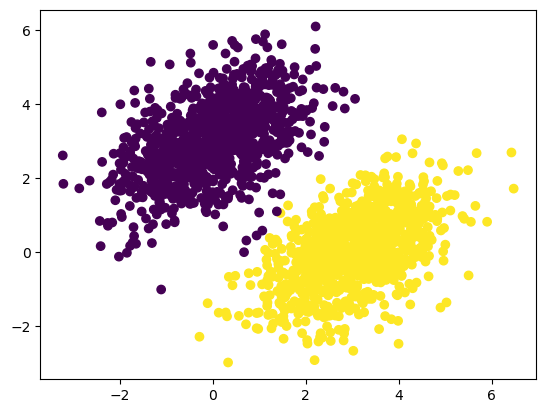

In [34]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
# 불린 배열은 색상 맵(color map)을 사용하여 색상으로 변환되며, 결과적으로 이는 모델의 예측 값이 0.5보다
# 큰 샘플과 작은 샘플을 다른 색으로 표시
plt.show()

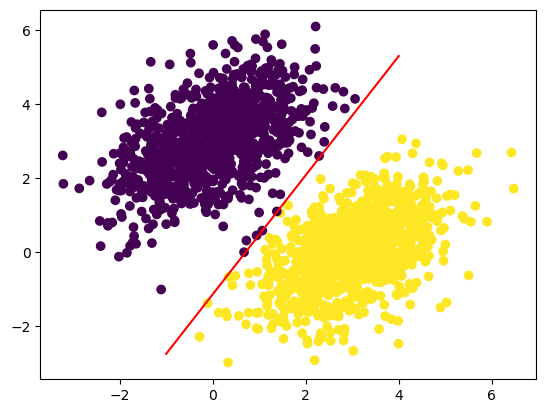

In [35]:
x = np.linspace(-1, 4, 100) # -1에서 4까지의 범위에서 균일하게 간격을 둔 100개의 숫자를 생성
# 사실 100개의 x 축 좌표를 만들 필요 없이 시작과 종료 위치만 있어도 됩니다.
# x = [-1, 4]
# 생성한 x값에 대한 결정 경계의 y좌표를 계산
#  W[0] / W[1] * x 부분은 입력 데이터의 첫 번째 특성(x좌표)에 대한 가중치와 두 번째 특성(y좌표)에 대한 가중치의 비율
# (0.5 - b) / W[1] 부분은 결정 경계가 y축을 어디에서 절편하는지를 결정
y = - W[0] /  W[1] * x + (0.5 - b) / W[1] # W는 분류기의 가중치이고, b는 편향입니다.
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

##### 과제_0703: 핵심 Keras API 이해하기 내용을 코드로 작성하고 설명해보세요.

## 층: 딥러닝의 구성 요소

### 케라스의 Layer 클래스

#### Layer의 서브클래스로 구현한 Dense 층

In [36]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y


In [37]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


#### 자동 크기 추론: 동적으로 층 만들기

In [38]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [39]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [40]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

## 층에서 모델로

## “컴파일” 단계: 학습 과정 설정

In [41]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [42]:
# 매개변수를 인스턴스 객체로 지정할 수도 있음
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

### 손실 함수 선택하기

### fit() 메서드 이해하기

#### 넘파이 데이터로 fit() 메서드 호출하기

In [43]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
16/16 [==============================] - 0s 1ms/step - loss: 13.2105 - binary_accuracy: 0.0425
Epoch 2/5
16/16 [==============================] - 0s 1ms/step - loss: 12.7726 - binary_accuracy: 0.0435
Epoch 3/5
16/16 [==============================] - 0s 1ms/step - loss: 12.3956 - binary_accuracy: 0.0450
Epoch 4/5
16/16 [==============================] - 0s 1ms/step - loss: 12.0339 - binary_accuracy: 0.0455
Epoch 5/5
16/16 [==============================] - 0s 1ms/step - loss: 11.6795 - binary_accuracy: 0.0465


In [44]:
history.history

{'loss': [13.210466384887695,
  12.772619247436523,
  12.395627975463867,
  12.033933639526367,
  11.679484367370605],
 'binary_accuracy': [0.042500000447034836,
  0.04349999874830246,
  0.04500000178813934,
  0.045499999076128006,
  0.04650000110268593]}

### 검증 데이터에서 손실과 측정 지표 모니터링하기

#### validation_data 매개변수 사용하기

In [45]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])
 # 입력 배열의 길이(len(inputs))에 해당하는 정수들의 무작위 순열(permutation)을 생성
indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 0s 3ms/step - loss: 0.1651 - binary_accuracy: 0.9407 - val_loss: 0.0312 - val_binary_accuracy: 1.0000
Epoch 2/5
88/88 [==============================] - 0s 1ms/step - loss: 0.0723 - binary_accuracy: 0.9571 - val_loss: 0.0348 - val_binary_accuracy: 0.9967
Epoch 3/5
88/88 [==============================] - 0s 1ms/step - loss: 0.0706 - binary_accuracy: 0.9571 - val_loss: 0.1320 - val_binary_accuracy: 0.9583
Epoch 4/5
88/88 [==============================] - 0s 1ms/step - loss: 0.0730 - binary_accuracy: 0.9479 - val_loss: 0.1228 - val_binary_accuracy: 0.9550
Epoch 5/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0680 - binary_accuracy: 0.9614 - val_loss: 0.0539 - val_binary_accuracy: 0.9883


### 추론: 훈련한 모델 사용하기

In [46]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

5/5 [==============================] - 0s 1ms/step
[[ 0.63558245]
 [ 0.7283013 ]
 [-0.28070498]
 [-0.04658329]
 [-0.41041875]
 [ 0.13289025]
 [-0.12058145]
 [ 0.83563954]
 [ 1.0350287 ]
 [-0.1806544 ]]


## 요약